In [45]:
import numpy as np
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import utils
import sys

#Must Change if puzzle is a different size
ROWS = 5
COLUMNS = 5

#Loads Training Data
#data = np.loadtxt('../data/random_canon_SUSPs_r5_c5.csv',dtype = float, delimiter = ',')
data = np.loadtxt('../data/HeursticData.csv',dtype = float, delimiter = ',' )

#Choose which heuristics to attempt to learn (Column 8 or 9)
y = data[:,8]


#Choosing which features to include in X data Remove other heuristics -- likely
#X = data[:,8:-1]
#print(data[0])

X = data[:,10:-1] #Currently doesnt include Percent features
print(X[0])


#Creates a testing and training split that is stratified #Not stratified!
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(len(x_train))
print(len(x_test))

print(y)

[0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0.]
8000
2000
[14. 15. 19. ...  8. 10. 11.]


In [46]:
%matplotlib inline
"""
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE


# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
#models.append(('KN5', KNeighborsClassifier()))  # Too Slow commented out
#models.append(('KN7', KNeighborsClassifier(n_neighbors=7)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('LIN', SVC(kernel='linear',gamma='auto')))
#models.append(('RF',RandomForestClassifier(n_estimators=100)))

# evaluate each model in turn
# note that I'm going to run through each model above
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure

results = []
classifiers = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	classifiers.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

    
    
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(classifiers)
plt.show()

#print('\n***Performing t-tests***\n\n')

    
#ttest,pval = stats.ttest_rel(results[0], results[1])
#print('P-Val between ZeroR and Logistic Regression: %.2f' % pval)

#if pval<0.05:
#    print("reject null hypothesis")
#else:
#    print("accept null hypothesis") 

#print()    

"""


'\nimport matplotlib.pyplot as plt\nfrom scipy import stats\n\nfrom sklearn import model_selection\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.svm import SVC\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.dummy import DummyClassifier\nfrom sklearn.feature_selection import RFE\n\n\n# prepare configuration for cross validation test harness\nseed = 1\n\n# prepare models\nmodels = []\nmodels.append((\'ZR\', DummyClassifier(strategy="most_frequent")))\nmodels.append((\'LR\', LogisticRegression(solver=\'liblinear\')))\n#models.append((\'KN5\', KNeighborsClassifier()))  # Too Slow commented out\n#models.append((\'KN7\', KNeighborsClassifier(n_neighbors=7)))\nmodels.append((\'DT\', DecisionT

In [47]:
#Baseline Regression Model

def mse_eval(actual, predicted):
    sum = 0.0
    for y in range(len(actual)):
        sum += (predicted[y] - actual[y])**2
    avg = sum/len(predicted)
    return avg

def zeroRR(train_y, test_y):
    meanOfY = mean(train_y)
    predicitions = [meanOfY for data in test_y]
    return predicitions

def mean(listOfValues):
    sum = 0
    for data in listOfValues:
        sum += data
    return sum/len(listOfValues)

print("Baseline: ", rmse_eval(y_test, zeroRR(y_train, y_test)))


Baseline:  4.744851685313779


Num of Features:  75
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 98)                7448      
_________________________________________________________________
dense_238 (Dense)            (None, 98)                9702      
_________________________________________________________________
dropout_167 (Dropout)        (None, 98)                0         
_________________________________________________________________
dense_239 (Dense)            (None, 98)                9702      
_________________________________________________________________
dropout_168 (Dropout)        (None, 98)                0         
_________________________________________________________________
dense_240 (Dense)            (None, 98)                9702      
_________________________________________________________________
dropout_169 (Dropout)        (None, 98)                

Epoch 12/200
6400/6400 [==============================] - 1s 79us/step - loss: 28.3149 - mean_squared_error: 28.3149 - val_loss: 35.6452 - val_mean_squared_error: 35.6452
Epoch 13/200
6400/6400 [==============================] - 1s 80us/step - loss: 27.9797 - mean_squared_error: 27.9797 - val_loss: 30.7839 - val_mean_squared_error: 30.7839
Epoch 14/200
6400/6400 [==============================] - 1s 80us/step - loss: 27.6233 - mean_squared_error: 27.6233 - val_loss: 29.7011 - val_mean_squared_error: 29.7011
Epoch 15/200
6400/6400 [==============================] - 1s 79us/step - loss: 27.2060 - mean_squared_error: 27.2060 - val_loss: 29.3242 - val_mean_squared_error: 29.3242
Epoch 16/200
6400/6400 [==============================] - 1s 82us/step - loss: 27.2338 - mean_squared_error: 27.2338 - val_loss: 32.7555 - val_mean_squared_error: 32.7555
Epoch 17/200
6400/6400 [==============================] - 0s 77us/step - loss: 27.1706 - mean_squared_error: 27.1706 - val_loss: 30.6691 - val_me

Epoch 60/200
6400/6400 [==============================] - 0s 73us/step - loss: 15.0971 - mean_squared_error: 15.0971 - val_loss: 19.2814 - val_mean_squared_error: 19.2814
Epoch 61/200
6400/6400 [==============================] - 1s 79us/step - loss: 15.3219 - mean_squared_error: 15.3219 - val_loss: 21.0666 - val_mean_squared_error: 21.0666
Epoch 62/200
6400/6400 [==============================] - 0s 72us/step - loss: 14.7463 - mean_squared_error: 14.7463 - val_loss: 20.7273 - val_mean_squared_error: 20.7273
Epoch 63/200
6400/6400 [==============================] - 1s 81us/step - loss: 15.0301 - mean_squared_error: 15.0301 - val_loss: 21.5551 - val_mean_squared_error: 21.5551
Epoch 64/200
6400/6400 [==============================] - 0s 73us/step - loss: 14.8024 - mean_squared_error: 14.8024 - val_loss: 20.3746 - val_mean_squared_error: 20.3746
Epoch 65/200
6400/6400 [==============================] - 1s 79us/step - loss: 14.6235 - mean_squared_error: 14.6235 - val_loss: 21.8143 - val_me

Epoch 108/200
6400/6400 [==============================] - 0s 73us/step - loss: 11.3749 - mean_squared_error: 11.3749 - val_loss: 20.6885 - val_mean_squared_error: 20.6885
Epoch 109/200
6400/6400 [==============================] - 0s 72us/step - loss: 11.2202 - mean_squared_error: 11.2202 - val_loss: 19.4317 - val_mean_squared_error: 19.4317
Epoch 110/200
6400/6400 [==============================] - 0s 72us/step - loss: 10.9317 - mean_squared_error: 10.9317 - val_loss: 19.6719 - val_mean_squared_error: 19.6719
Epoch 111/200
6400/6400 [==============================] - 0s 73us/step - loss: 11.2890 - mean_squared_error: 11.2890 - val_loss: 22.8497 - val_mean_squared_error: 22.8497
Epoch 112/200
6400/6400 [==============================] - 0s 77us/step - loss: 11.0397 - mean_squared_error: 11.0397 - val_loss: 20.9734 - val_mean_squared_error: 20.9734
Epoch 113/200
6400/6400 [==============================] - 0s 74us/step - loss: 10.9474 - mean_squared_error: 10.9474 - val_loss: 19.0669 - 

Epoch 156/200
6400/6400 [==============================] - 0s 73us/step - loss: 9.9973 - mean_squared_error: 9.9973 - val_loss: 20.8160 - val_mean_squared_error: 20.8160
Epoch 157/200
6400/6400 [==============================] - 0s 73us/step - loss: 9.8870 - mean_squared_error: 9.8870 - val_loss: 22.0661 - val_mean_squared_error: 22.0661
Epoch 158/200
6400/6400 [==============================] - 0s 75us/step - loss: 9.7443 - mean_squared_error: 9.7443 - val_loss: 21.4680 - val_mean_squared_error: 21.4680
Epoch 159/200
6400/6400 [==============================] - 0s 73us/step - loss: 9.5614 - mean_squared_error: 9.5614 - val_loss: 20.3293 - val_mean_squared_error: 20.3293
Epoch 160/200
6400/6400 [==============================] - 0s 73us/step - loss: 9.3190 - mean_squared_error: 9.3190 - val_loss: 18.4874 - val_mean_squared_error: 18.4874
Epoch 161/200
6400/6400 [==============================] - 0s 74us/step - loss: 9.6120 - mean_squared_error: 9.6120 - val_loss: 19.1484 - val_mean_squ

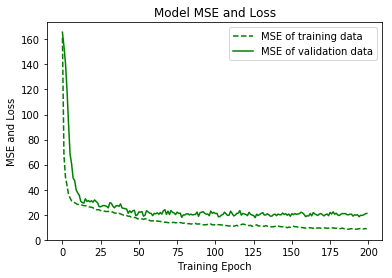


--- Check against test data ---

2000/2000 [==============================] - 0s 76us/step

Mean Squared Error on test data: 22.28


In [52]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import Dropout
from matplotlib import pyplot as plt
from keras import optimizers
import keras

numFeatures = len(X[0])
print("Num of Features: ", numFeatures)


DropoutAmount = 0.3
NodesPerLayer= int((DropoutAmount*numFeatures)) + numFeatures + 1

model_m = Sequential()
model_m.add(Dense(NodesPerLayer, activation='relu', input_shape=(numFeatures,)))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu', input_shape=(numFeatures,)))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu', input_shape=(numFeatures,)))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu', input_shape=(numFeatures,)))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(NodesPerLayer, activation='relu'))
model_m.add(Dropout(DropoutAmount))
model_m.add(Dense(1, activation='linear', kernel_initializer='normal'))
print(model_m.summary())


callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    #keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=3) #Is Val Loss correct?
]

opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_m.compile(loss='mean_squared_error',
                optimizer=opt, metrics=['mean_squared_error'])

BATCH_SIZE = 300
EPOCHS = 200

history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['mean_squared_error'], "g--", label="MSE of training data")
plt.plot(history.history['val_mean_squared_error'], "g", label="MSE of validation data")
plt.title('Model MSE and Loss')
plt.ylabel('MSE and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

print("\n--- Check against test data ---\n")


#8 by 5, 9 by 5

score = model_m.evaluate(x_test, y_test, verbose=1)

print("\nMean Squared Error on test data: %0.2f" % score[1])


In [12]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import time

modelName = "best_model.52-0.31.h5"

#data =  np.loadtxt('../data/random_c_r5_c5.csv',dtype = float, delimiter = ',')
#names = data[0]
#data = data[1:]

#Sets class data to y
#y = data[:,-1]

#Choosing which features to include in X data Must be same as trained above
#X = data[:,5:-1]

#y = keras.utils.to_categorical(y) 



model = load_model(modelName)
model.summary()

first = time.time()

score = model_m.evaluate(x_test, y_test, verbose=1)

end = time.time()

total = end - first

y_pred = model_m.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()

print("True Positives: ", tp)
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)


suspNum = 0

for instance in y_test:
    if instance[1] == 1:
        suspNum += 1

print("\nRecall: %0.3f" % (tp/(tp+fn)))
print("Precision: %0.3f" % (tp/(tp+fp)))

print("Accuracy on test data: %0.3f" % (tp+tn)/len(y_test))
print("\nLoss on test data: %0.3f" % score[0])

print("Total Time: ", total)
print("Time Per: ", total/len(X))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 102)               8058      
_________________________________________________________________
dense_2 (Dense)              (None, 102)               10506     
_________________________________________________________________
dropout_1 (Dropout)          (None, 102)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 102)               10506     
_________________________________________________________________
dropout_2 (Dropout)          (None, 102)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 102)               10506     
_________________________________________________________________
dropout_3 (Dropout)          (None, 102)               0         
__________

TypeError: unsupported operand type(s) for /: 'str' and 'int'